### Problem statement:-
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

### Steps:-
Reading, understanding and visualising the data
Preparing the data for modelling
Building the model
Evaluate the model

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

### Reading and understanding the data

In [3]:
# Reading the dataset
df = pd.read_csv('train.csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
df.shape

(69999, 172)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

### Handling missing values
Handling missing values in columns

In [7]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


In [8]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [9]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [10]:
df.shape

(69999, 142)

#### Deleting the date columns as the date columns are not required in our analysis

In [11]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [12]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

#### Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.

In [13]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [14]:
df.shape

(69999, 135)

#### Filter high-value customers
Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [15]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

Finding the 70th percentile of the avg_rech_amt_6_7

In [16]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

370.0

Filter the customers, who have recharged more than or equal to X.

In [17]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,0.0,0.0,0.0,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,0.0,0.0,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507

In [18]:
df.shape

(21018, 136)

Handling missing values in rows

In [19]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(80, 136)

In [20]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(20938, 136)

In [21]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_og_mou_8,2.75
loc_og_t2t_mou_8,2.75
loc_og_t2f_mou_8,2.75
std_ic_t2o_mou_8,2.75
loc_og_t2c_mou_8,2.75
...,...
total_rech_amt_8,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00


In [22]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 2.75]).index).to_list())

['loc_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'std_ic_t2t_mou_8', 'og_others_8', 'loc_ic_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'roam_og_mou_8', 'spl_ic_mou_8', 'onnet_mou_8', 'roam_ic_mou_8', 'isd_ic_mou_8', 'offnet_mou_8', 'ic_others_8']


In [23]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
177,177,0.0,0.0,0.0,596.301,146.073,0.0,55.19,3.26,NaN,45.51,12.34,NaN,0.0,0.0,NaN,0.0,0.00,NaN,55.19,3.26,NaN,43.83,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,99.03,15.61,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.3,0.0,NaN,0.0,0.0,NaN,1.30,0.00,NaN,0.0,0.0,NaN,0.38,2.71,NaN,1.29,0.0,NaN,102.01,18.33,0.0,50.01,16.66,NaN,160.68,58.53,NaN,5.06,0.40,NaN,215.76,75.59,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.13,0.0,NaN,0.0,0.0,NaN,1.13,0.00,NaN,217.04,75.59,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.15,0.00,NaN,12,8,5,704,178,0,154,50,0,154,30,0,284.50,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,332,0.0,0.0,0.00,1,441.0
183,183,0.0,0.0,0.0,263.340,806.465,0.0,211.89,119.89,NaN,94.69,106.08,NaN,0.0,0.0,NaN,0.0,0.00,NaN,18.88,1.08,NaN,7.51,0.69,NaN,1.43,1.88,NaN,0.00,25.24,NaN,27.83,3.66,NaN,193.01,118.81,NaN,85.74,78.24,NaN,0.0,0.0,NaN,0.0,0.0,NaN,278.76,197.06,NaN,0.0,0.0,NaN,0.00,27.18,NaN,0.00,0.0,NaN,306.59,227.91,0.0,27.09,8.13,NaN,11.98,1.13,NaN,0.33,1.08,NaN,39.41,10.34,NaN,112.68,163.94,NaN,117.29,41.58,NaN,0.00,0.0,NaN,0.0,0.0,NaN,229.98,205.53,NaN,269.99,216.29,0.0,0.43,0.0,NaN,0.0,0.0,NaN,0.16,0.41,NaN,8,7,0,658,541,0,250,110,0,250,10,0,0.11,0.0,0.0,489.11,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,3052,0.0,0.0,99.46,1,599.5
491,491,0.0,0.0,0.0,1748.607,1172.416,0.0,3709.38,2343.29,NaN,835.58,698.74,NaN,0.0,0.0,NaN,0.0,64.39,NaN,0.85,1.26,NaN,15.79,22.78,NaN,0.00,0.00,NaN,139.68,201.14,NaN,16.64,24.04,NaN,3708.53,2304.93,NaN,771.18,595.94,NaN,0.0,0.0,NaN,0.0,0.0,NaN,4479.71,2900.88,NaN,0.0,0.0,NaN,179.71,354.26,NaN,20.96,0.0,NaN,4697.04,3279.19,0.0,0.00,9.46,NaN,63.89,64.91,NaN,0.00,5.06,NaN,63.89,79.44,NaN,20.46,23.14,NaN,119.13,159.39,NaN,0.00,0.0,NaN,0.0,0.0,NaN,139.59,182.54,NaN,203.49,261.99,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.00,0.00,NaN,44,24,2,2051,1363,0,120,150,0,50,110,0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1209,0.0,0.0,0.00,1,1707.0
597,597,0.0,0.0,0.0,578.568,141.341,0.0,236.08,103.83,NaN,545.13,106.46,NaN,0.0,0.0,NaN,0.0,0.00,NaN,36.26,6.05,NaN,75.73,36.29,NaN,0.00,0.00,NaN,0.00,0.00,NaN,111.99,42.34,NaN,199.81,97

In [24]:
df_null_mou_8.shape

(575, 136)

In [25]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [26]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_ic_mou_6,0.62
loc_og_mou_6,0.62
loc_ic_mou_6,0.62
loc_ic_t2f_mou_6,0.62
loc_og_t2f_mou_6,0.62
...,...
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00
og_others_8,0.00


In [27]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.62]).index).to_list())

['isd_ic_mou_6', 'loc_og_mou_6', 'loc_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_t2f_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2t_mou_6', 'og_others_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_6', 'spl_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2c_mou_6', 'roam_ic_mou_6', 'std_ic_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'std_ic_t2o_mou_6', 'ic_others_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'roam_og_mou_6', 'onnet_mou_6']


In [28]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
599,599,0.0,0.0,0.0,726.813,726.788,438.050,NaN,NaN,0.00,NaN,NaN,3.30,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,3.30,NaN,NaN,0.0,0.0,0.00,3.30,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.0,0.00,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,2,3,3,855,855,505,855,855,505,855,0,0,0.0,0.00,0.00,4675.12,6384.93,3159.12,0,0,0,0,0,0,1,1,1,0,0,0,451,0.0,0.00,0.00,0,855.0
2248,2248,0.0,0.0,0.0,387.414,386.494,774.756,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.55,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.55,0.0,0.00,0.55,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,1,3,3,455,455,910,455,455,455,455,0,455,0.0,0.00,0.00,950.02,1720.94,1973.26,0,0,0,0,0,0,1,1,2,0,0,0,445,0.0,0.00,0.00,0,455.0
2393,2393,0.0,0.0,0.0,0.040,673.807,796.780,NaN,65.29,56.19,NaN,381.54,539.66,NaN,0.0,0.0,NaN,0.68,0.0,NaN,31.54,23.93,NaN,140.18,224.28,NaN,1.43,0.0,NaN,0.0,0.0,NaN,173.16,248.21,NaN,33.33,32.26,NaN,237.09,315.38,NaN,2.56,0.0,NaN,0.0,0.0,NaN,272.99,347.64,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.0,0.0,446.16,595.86,NaN,21.36,14.74,NaN,99.06,113.74,NaN,0.68,0.00,NaN,121.11,128.49,NaN,81.54,40.11,NaN,181.59,273.76,NaN,7.71,9.49,NaN,0.0,0.0,NaN,270.86,323.38,0.0,391.98,451.93,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.05,1,21,26,0,805,977,0,50,61,0,30,50,0.0,670.34,656.06,0.00,0.00,0.00,0,0,0,0,7,7,0,0,0,0,0,0,479,0.0,0.00,0.00,0,402.5
2754,2754,0.0,0.0,0.0,0.000,492.442,575.801,NaN,396.01,449.61,NaN,391.98,375.64,NaN,0.0,0.0,NaN,0.00,0.0,NaN,57.46,99.26,NaN,60.79,137.11,NaN,0.00,0.0,NaN,0.0,0.0,NaN,118.26,236.38,NaN,338.54,350.34,NaN,313.84,226.11,NaN,0.00,0.0,NaN,0.0,0.0,NaN,652.39,576.46,NaN,0.0,0.0,NaN

In [29]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [30]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_7,0.15
ic_others_7,0.15
loc_og_t2c_mou_7,0.15
loc_og_mou_7,0.15
std_og_t2t_mou_7,0.15
...,...
std_og_mou_8,0.00
std_og_mou_6,0.00
std_og_t2c_mou_8,0.00
std_og_t2c_mou_6,0.00


In [31]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.15]).index).to_list())

['loc_ic_t2f_mou_7', 'ic_others_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_og_t2m_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'loc_og_t2f_mou_7', 'std_ic_t2f_mou_7', 'roam_ic_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_7', 'onnet_mou_7', 'roam_og_mou_7']


In [32]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
1054,1054,0.0,0.0,0.0,903.979,0.000,317.133,181.98,NaN,90.56,2062.21,NaN,688.96,0.86,NaN,2.45,4.56,NaN,7.85,85.88,NaN,48.54,28.51,NaN,10.54,0.00,NaN,0.00,0.00,NaN,0.0,114.39,NaN,59.09,95.29,NaN,42.01,2021.53,NaN,670.56,0.00,NaN,0.00,0.0,NaN,0.0,2116.83,NaN,712.58,0.00,NaN,0.0,8.39,NaN,0.0,0.00,NaN,0.0,2239.63,0.0,771.68,65.98,NaN,23.78,30.41,NaN,9.46,3.38,NaN,0.00,99.78,NaN,33.24,1.16,NaN,17.90,2.31,NaN,7.04,0.0,NaN,0.00,0.0,NaN,0.0,3.48,NaN,24.94,103.26,0.0,58.19,0.00,NaN,0.0,0.00,NaN,0.0,0.00,NaN,0.0,6,1,5,932,0,445,229,0,229,229,0,229,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,966,0.00,0.00,0.00,0,466.0
1404,1404,0.0,0.0,0.0,254.142,426.744,305.578,1.40,NaN,39.13,1.91,NaN,118.33,0.00,NaN,22.18,3.31,NaN,157.46,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.0,0.00,NaN,0.0,0.00,0.0,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.0,0.00,NaN,0.00,0.00,0.0,0.00,0.00,NaN,0.0,0.00,NaN,0.0,0.00,NaN,0.0,3,5,5,293,504,402,252,252,252,41,252,0,3.13,0.34,95.35,1150.2,1858.53,225.55,0,0,0,0,0,0,1,2,1,0,0,0,566,77.44,36.73,9.21,0,398.5
1641,1641,0.0,0.0,0.0,973.728,0.000,244.360,178.84,NaN,80.71,392.38,NaN,118.23,0.00,NaN,0.00,0.00,NaN,0.00,156.89,NaN,71.18,308.61,NaN,88.31,46.08,NaN,8.76,0.08,NaN,0.0,511.59,NaN,168.26,21.94,NaN,9.53,20.81,NaN,11.53,16.78,NaN,9.61,0.0,NaN,0.0,59.54,NaN,30.68,0.93,NaN,0.0,0.08,NaN,0.0,0.00,NaN,0.0,572.16,0.0,198.94,40.23,NaN,53.19,326.46,NaN,50.38,5.59,NaN,0.18,372.29,NaN,103.76,1.66,NaN,0.00,0.00,NaN,2.01,0.0,NaN,6.58,0.0,NaN,0.0,1.66,NaN,8.59,373.96,0.0,112.36,0.00,NaN,0.0,0.00,NaN,0.0,0.00,NaN,0.0,7,4,3,750,0,500,250,0,250,0,0,250,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,3370,0.00,0.00,0.00,0,375.0
10706,10706,0.0,0.0,0.0,972.338,0.000,100.618,990.83,NaN,14.38,1049.53,NaN,25.81,0.00,NaN,0.05,17.48,NaN,40.71,10.64,NaN,0.00,27.23,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,37.88,NaN,0.00,9

In [33]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [34]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
id,0.0
spl_ic_mou_8,0.0
std_ic_mou_8,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
...,...
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0
std_og_t2m_mou_6,0.0
std_og_t2t_mou_8,0.0


In [35]:
df.shape

(20206, 136)

In [36]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/21018)),2)

0.04

We can see that we have lost almost 4% records. But we have enough number of records to do our analysis.

### Tag churners
Now tag the churned customers (churn=1, else 0) based on the third month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [37]:
df['churn'] = np.where((df['total_ic_mou_8']==0) & (df['total_og_mou_8']==0) & (df['vol_2g_mb_8']==0) & (df['vol_3g_mb_8']==0), 1, 0)

In [38]:
df.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,0.0,0.0,0.0,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,0.0,0.0,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,0
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,0
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.8

Deleting all the attributes corresponding to the churn phase

In [39]:
# List the columns for churn month(8)
col_8 = [col for col in df.columns.to_list() if '_8' in col]
print(col_8)

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8']


In [40]:
# Deleting the churn month columns
df = df.drop(col_8, axis=1)

Checking churn percentage

In [41]:
round(100*(df['churn'].mean()),2)

3.07

#### Outliers treatment
In the filtered dataset except id and churn columns all the columns are numeric types. Hence, converting id and churn datatype to object.

In [42]:
df['id'] = df['id'].astype(object)
df['churn'] = df['churn'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20206 entries, 12 to 69996
Data columns (total 95 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20206 non-null  object 
 1   loc_og_t2o_mou      20206 non-null  float64
 2   std_og_t2o_mou      20206 non-null  float64
 3   loc_ic_t2o_mou      20206 non-null  float64
 4   arpu_6              20206 non-null  float64
 5   arpu_7              20206 non-null  float64
 6   onnet_mou_6         20206 non-null  float64
 7   onnet_mou_7         20206 non-null  float64
 8   offnet_mou_6        20206 non-null  float64
 9   offnet_mou_7        20206 non-null  float64
 10  roam_ic_mou_6       20206 non-null  float64
 11  roam_ic_mou_7       20206 non-null  float64
 12  roam_og_mou_6       20206 non-null  float64
 13  roam_og_mou_7       20206 non-null  float64
 14  loc_og_t2t_mou_6    20206 non-null  float64
 15  loc_og_t2t_mou_7    20206 non-null  float64
 16  loc_og_t

In [43]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7',
       'og_others_6', 'og_others_7', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_

In [44]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(20004, 95)

Derive new features

In [45]:

# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7']

#### Deriving new column decrease_mou_action
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [46]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [47]:
# Avg. mou at action phase
# We are taking average because there are two months(6 and 7) in action phase
data['avg_mou_action'] = (data['total_og_mou_6'] + data['total_og_mou_7'] + data['total_ic_mou_6'] + data['total_ic_mou_7'])/2

In [48]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [49]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [50]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0.0,0,405.0,0,1018.32,823.405,-194.915,1


#### Deriving new column decrease_rech_num_action
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [51]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_6'] + data['total_rech_num_7'])/2

In [52]:
# Difference total_rech_num_6 and total_rech_num_7
data['diff_rech_num'] = data['total_rech_num_7'] - data['total_rech_num_6']

In [53]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [54]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0,12.5,-5,1
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0,4.0,-2,1
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1,22.5,-7,1
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1,7.0,0,0
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0.0,0,405.0,0,1018.32,823.405,-194.915,1,6.5,-3,1


#### Deriving new column decrease_rech_amt_action
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [55]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [56]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['total_rech_amt_7'] - data['total_rech_amt_6']

In [57]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [58]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0,12.5,-5,1,469.5,-103,1
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0,4.0,-2,1,527.0,-254,1
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1,22.5,-7,1,1205.0,-430,1
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1,7.0,0,0,433.5,-13,1
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0.0,

#### Deriving new column decrease_arpu_action
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [59]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_6'])/2

In [60]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['arpu_7'] - data['arpu_6']

In [61]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [62]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0,12.5,-5,1,469.5,-103,1,418.9325,-41.973,1
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0,4.0,-2,1,527.0,-254,1,478.9215,-203.255,1
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1,22.5,-7,1,1205.0,-430,1,1018.2270,-225.442,1
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1,7.0,0,0,433.5,-13,1,362.0215,-19.905,1
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,

#### Deriving new column decrease_vbc_action
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [63]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [64]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [65]:

# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [66]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0,12.5,-5,1,469.5,-103,1,418.9325,-41.973,1,0.0,0.0,0
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0,4.0,-2,1,527.0,-254,1,478.9215,-203.255,1,0.0,0.0,0
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1,22.5,-7,1,1205.0,-430,1,1018.2270,-225.442,1,0.0,0.0,0
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1,7.0,0,0,433.5,-13,1,362.0215,-19.905,1,0.0,0.0,0
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.9

## EDA
#### Univariate analysis
Churn rate on the basis whether the customer decreased her/his MOU in action month

In [67]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

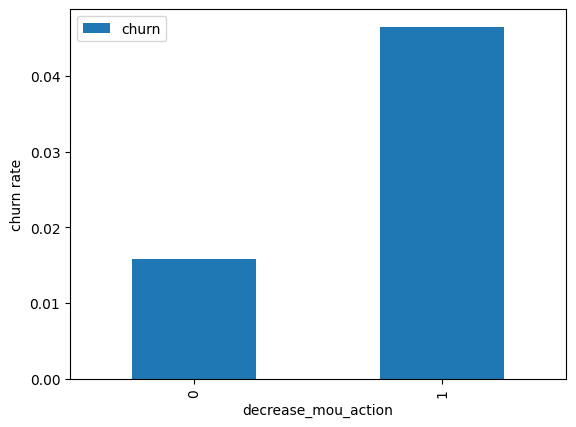

In [68]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Analysis

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

Churn rate on the basis whether the customer decreased her/his number of recharge in action month

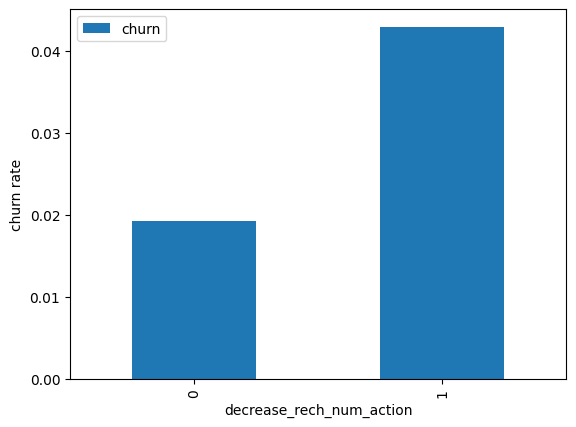

In [69]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Analysis

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

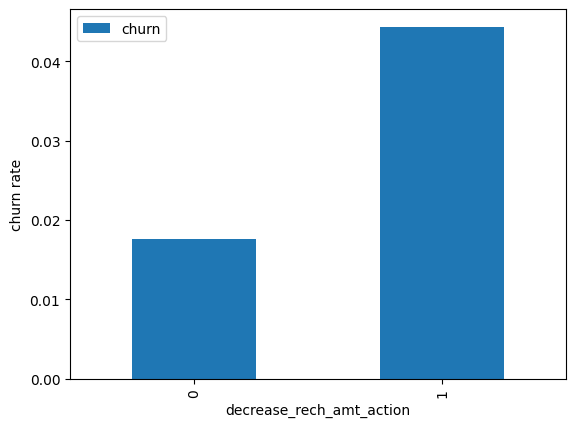

In [70]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Analysis

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

Churn rate on the basis whether the customer decreased her/his volume based cost in action month

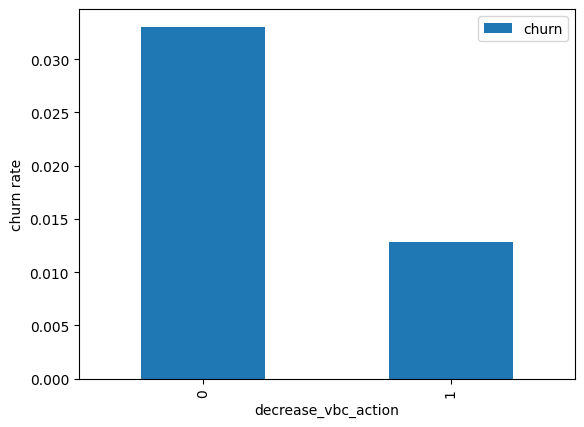

In [71]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Analysis

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

Analysis of the average revenue per customer (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase ARPU')]

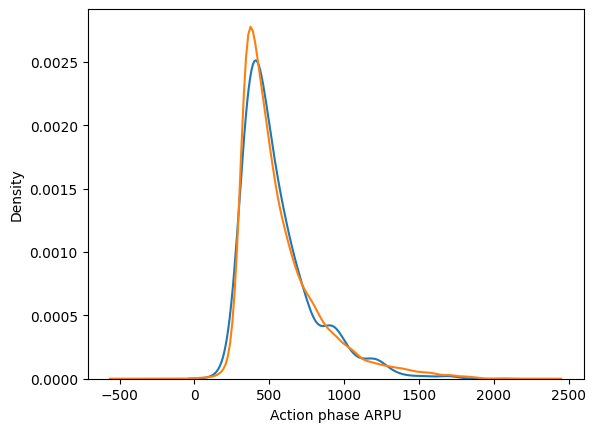

In [72]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

#### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

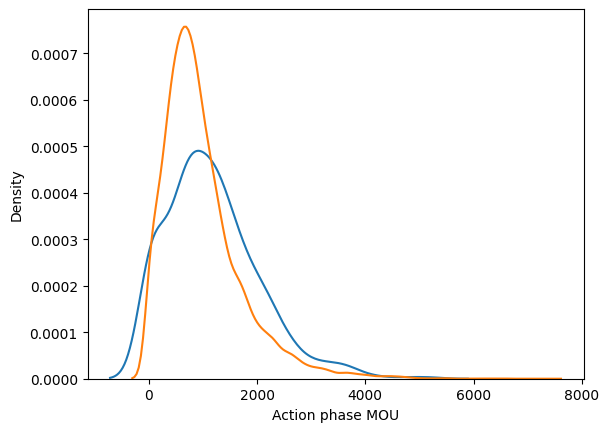

In [73]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis
Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

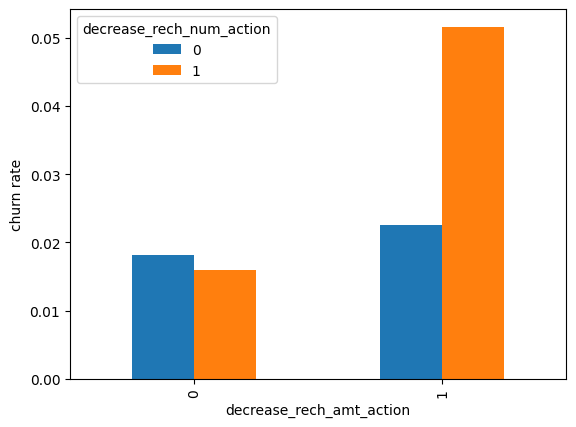

In [74]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

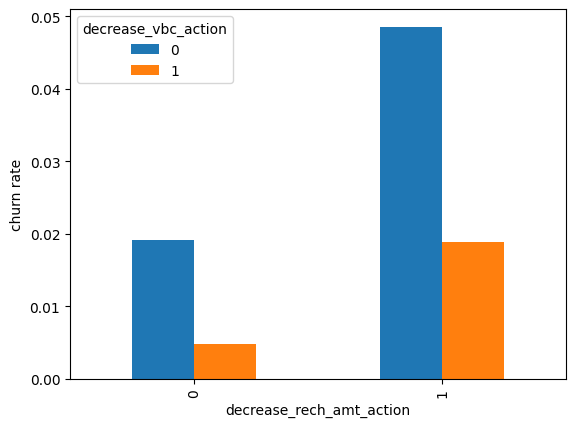

In [75]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

Analysis of recharge amount and number of recharge in action month

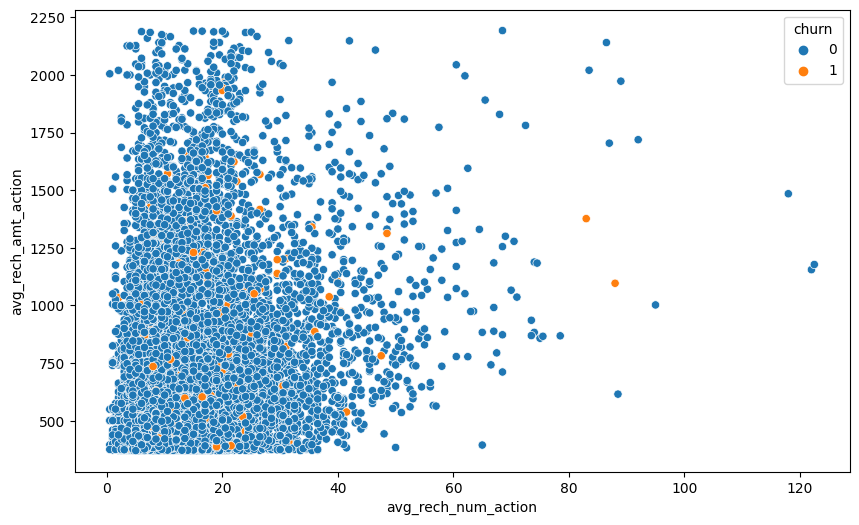

In [76]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=data,x='avg_rech_num_action',y='avg_rech_amt_action', hue='churn')

Analysis

We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis

In [77]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Train-Test Split

In [78]:
# Import library
from sklearn.model_selection import train_test_split

In [79]:
# Putting feature variables into X
X = data.drop(['id','churn'], axis=1)

In [80]:
# Putting target variable to y
y = data['churn']

In [81]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

#### Dealing with data imbalance
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [82]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [83]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [84]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

#### Feature Scaling

In [85]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [86]:
# Instantiate the Scaler
scaler = StandardScaler()

In [87]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [88]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [89]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,-1.912813,1.642688,-0.767077,0.610843,-0.940285,2.251581,-0.079825,-0.282860,-0.241957,-0.450002,-0.371119,0.580679,-0.663119,1.620456,-0.268733,-0.231617,-0.195254,-0.240758,-0.673652,1.365338,-0.633701,0.457662,-0.639614,1.784392,-0.145684,-0.124689,0.0,0.0,-0.929340,1.565948,-0.079441,0.060264,-0.361274,-0.319466,-0.381313,-0.013782,-1.214093,2.109261,-0.431200,0.390676,-0.692004,0.644255,-0.295744,-0.249742,-0.734559,0.594667,-0.270015,1.619636,-0.374546,0.810962,-0.133568,0.647397,0.0,0.0,-0.433273,1.542728,-0.830062,1.573871,-0.368855,-0.111648,-0.175776,2.295993,-0.078482,1.068107,-1.253165,0.499449,-1.587293,1.774442,-0.276361,0.051894,0.191498,0.678612,-0.240137,-0.229345,-0.240891,-0.242845,-0.242921,-0.247937,-0.257854,-0.247596,-0.214762,-0.21251,-0.123592,-0.111907,-0.833871,-0.239100,-0.244585,-0.242354,-0.521555,0,0,0,0,0
1,0.0,0.0,0.0,0.173971,0.827081,0.003370,-0.291041,-0.082782,1.224548,-0.281080,-0.343299,-0.317994,-0.488187,0.557750,0.102712,-0.517721,1.629499,-0.268733,-0.261577,1.505361,0.419888,-0.007598,1.061117,-0.158110,-0.301737,0.099163,0.644852,-0.145684,-0.124689,0.0,0.0,-0.047873,0.235909,-0.079441,-0.078059,2.797488,0.994728,-0.381313,-0.013782,0.016433,0.759836,0.322426,0.255862,-0.514481,0.637760,0.416255,-0.249742,-0.138677,0.519967,-0.270015,-0.101798,-0.369569,-0.237404,-0.133568,-0.133139,0.0,0.0,-0.429781,-0.237565,-0.320823,0.306222,-0.368855,-0.111648,-0.175776,-0.152307,-0.078482,-0.077384,0.239050,0.008693,0.186416,0.827886,-0.276361,-0.262429,0.191498,-0.103798,-0.238936,-0.221530,0.508217,-0.056350,-0.242921,-0.247937,1.148377,-0.247596,-0.214762,-0.21251,2.655222,2.747932,1.190556,-0.239100,-0.244585,0.282659,-0.521555,0,1,0,0,1
2,0.0,0.0,0.0,-0.463246,0.421694,-0.590172,-0.519873,0.177341,0.727372,-0.281080,-0.343299,-0.317994,-0.488187,0.175825,0.107919,2.162658,2.930586,-0.229097,-0.089636,-0.195254,-0.240758,1.501187,1.878706,-0.633701,-0.555346,-0.621113,-0.493554,-0.145684,0.997101,0.0,0.0,-0.916062,-0.717054,-0.079441,-0.078059,-0.361274,-0.339973,-0.381313,-0.013782,-0.237230,0.229734,0.024551,0.415674,1.220438,1.944312,0.079679,-0.067068,0.869431,1.506893,-0.270015,-0.215730,-0.374546,-0.303572,0.321183,1.352868,0.0,0.0,-0.373276,-0.174653,0.560687,1.152811,-0.368855,-0.111648,-0.175776,-0.152307,-0.078482,-0.077384,-1.023593,-0.972819,-0.124265,0.401385,1.470201,2.000697,2.451107,3.016414,-0.240137,-0.229345,-0.240891,-0.242845,-0.242921,-0.247937,-0.257854,-0.247596,-0.214762,-0.21251,-0.123592,-0.111907,1.442009,-0.239100,-0.244585,-0.242354

#### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [90]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
58165,0.0,0.0,0.0,-1.829937,3.360504,-0.785167,5.638024,-0.903817,1.170841,-0.218477,-0.333487,-0.187470,-0.400531,-0.371119,0.252829,-0.663119,0.500994,-0.268733,-0.261577,-0.195254,-0.240758,-0.673652,0.459458,-0.633701,6.124509,-0.639614,1.125514,-0.145684,-0.124689,0.0,0.0,-0.929340,5.091426,-0.079441,-0.078059,-0.361274,-0.339973,-0.381313,-0.013782,-1.214093,4.949540,-0.431200,-0.275927,-0.692004,-0.450268,-0.295744,-0.249742,-0.734559,-0.485325,-0.270015,-0.215730,-0.374546,-0.281476,-0.133568,-0.059531,0.0,0.0,-0.433273,-0.323222,-0.830062,-0.564590,-0.368855,-0.111648,-0.175776,-0.152307,-0.078482,-0.071033,-1.367951,4.670875,-1.982706,3.329107,-1.115321,-0.183848,-0.893904,-0.264051,-0.240137,-0.229345,-0.240891,-0.242845,-0.242921,-0.247937,-0.257854,-0.247596,-0.214762,-0.21251,-0.123592,-0.111907,-0.400814,-0.239100,-0.244585,-0.242354,-0.521555,0,0,0,0,0
603,0.0,0.0,0.0,-0.002097,-0.016685,-0.268630,0.775723,-0.292947,-0.736641,-0.267413,-0.332861,-0.121722,-0.226321,-0.313489,-0.319605,-0.584103,-0.516584,-0.268733,-0.261577,-0.195254,0.257540,-0.586812,-0.539463,-0.136454,1.000376,-0.024853,-0.474837,-0.145684,-0.124689,0.0,0.0,-0.120890,0.369670,-0.079441,0.108333,-0.312362,-0.084198,-0.381313,-0.013782,-0.388100,0.082615,-0.397213,-0.361453,-0.566938,-0.601446,-0.295744,-0.249742,-0.631013,-0.631077,-0.248492,-0.102101,-0.133365,-0.308671,-0.133568,-0.133139,0.0,0.0,-0.251849,-0.287285,-0.669816,-0.659262,-0.368855,-0.111648,-0.175776,-0.083080,-0.078482,-0.077384,3.912195,1.235583,-0.053656,-0.099410,-0.733975,-0.120984,-0.696559,-0.546850,-0.198968,2.020572,1.106922,-0.242845,-0.242921,-0.247937,8.179532,4.507642,-0.214762,-0.21251,-0.123592,1.318013,-0.970075,0.705686,-0.244585,2.078732,-0.521555,0,1,1,1,1
28696,0.0,0.0,0.0,-0.241650,0.107943,-0.664576,-0.370810,-0.034319,0.483168,-0.281080,0.848168,-0.317994,0.623342,-0.066946,0.204754,1.311554,1.687538,2.364839,2.749342,0.075717,0.524370,0.937517,1.319649,-0.619312,-0.552891,-0.588319,-0.522562,-0.100812,1.446394,0.0,0.0,-0.881179,-0.727361,-0.079441,-0.078059,-0.210310,-0.068818,-0.381313,-0.013782,-0.449406,-0.042302,0.630084,0.831278,2.798950,2.730535,5.265321,5.810414,2.992321,3.194121,0.088609,-0.085110,0.479285,0.443093,2.193129,0.685294,0.0,0.0,0.675870,0.340730,2.786247,2.764725,-0.368855,-0.111648,-0.175776,-0.152307,-0.078482,-0.077384,-0.794022,-0.482063,0.180767,0.357359,1.554097,3.195125,1.079554,-0.490290,0.150105,0.075954,0.270036,0.513215,-0.242921,-0.247937,-0.257854,-0.247596,2.310172,2.19392,1.265815,-0.111907,0.275548,1.

## Model with PCA

In [91]:
#Import PCA
from sklearn.decomposition import PCA

In [92]:
# Instantiate PCA
pca = PCA(random_state=42)

In [93]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [94]:
# Principal components
pca.components_

array([[ 1.54082884e-19,  0.00000000e+00, -1.11022302e-16, ...,
        -2.03904224e-02, -1.74142370e-02,  1.93239437e-02],
       [ 1.75620918e-19,  5.55111512e-17, -3.33066907e-16, ...,
         6.92474032e-03,  5.96751132e-04, -1.71111485e-02],
       [ 2.45377543e-19,  8.32667268e-17, -4.16333634e-17, ...,
        -4.03756529e-02, -3.97739736e-02,  3.29100700e-02],
       ...,
       [ 0.00000000e+00, -6.98867402e-02, -3.59919435e-01, ...,
         8.32667268e-17,  4.16333634e-17, -2.30718222e-16],
       [ 0.00000000e+00,  3.71959877e-02,  1.49259646e-01, ...,
         0.00000000e+00, -8.99887803e-17,  3.57353036e-16],
       [ 9.99998284e-01,  1.78796892e-03, -4.17535696e-04, ...,
        -2.16840434e-19, -2.39032698e-18,  5.28548559e-19]])

In [95]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.1107221  0.19466141 0.25045828 0.29905034 0.34332027 0.38591739
 0.42627101 0.45795711 0.48536327 0.51119648 0.53597259 0.55945363
 0.5824747  0.6034797  0.62276165 0.64175026 0.65972279 0.67710696
 0.69356378 0.7090776  0.72420614 0.73885805 0.75218183 0.76508128
 0.7768618  0.7883066  0.79950814 0.81035438 0.8207163  0.83041064
 0.83975501 0.84893457 0.85797485 0.86619997 0.87423836 0.8815608
 0.88845732 0.89470575 0.90073376 0.90652332 0.91222737 0.91774403
 0.92291516 0.92793872 0.93265582 0.9369326  0.94071351 0.9444219
 0.94803292 0.95144703 0.95477928 0.95807665 0.96120471 0.96423248
 0.96715489 0.97006416 0.97292078 0.97565507 0.97835192 0.98080815
 0.98319366 0.98552383 0.98778809 0.98979774 0.99172281 0.99335899
 0.99458737 0.99574844 0.99682991 0.9977387  0.9985514  0.99901912
 0.99945475 0.99985753 0.99996265 0.99999914 0.99999987 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.       

Text(0, 0.5, 'Cumulative Variance')

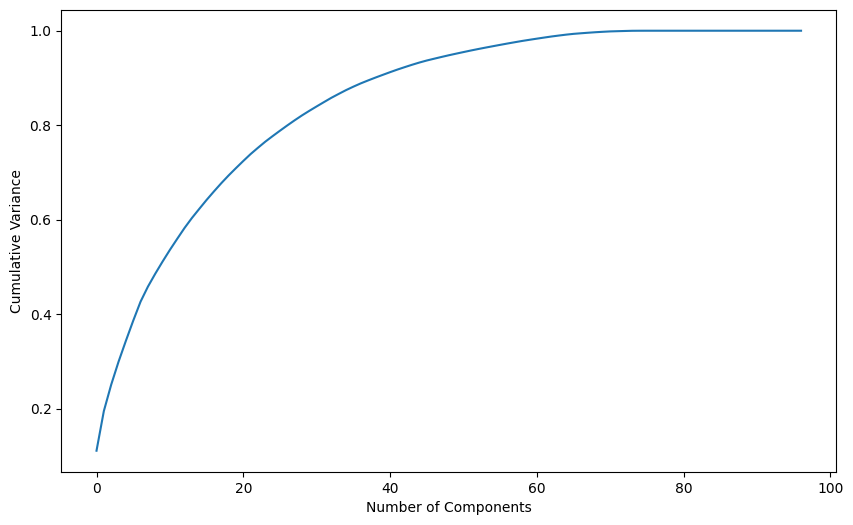

In [96]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

#### Performing PCA with 60 components

In [97]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

#### Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [98]:
X_test_pca = pca_final.transform(X_test)

#### Emphasize Sensitivity/Recall than Accuracy
We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

### Logistic regression with PCA

In [99]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [100]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [101]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.301248,0.009989,0.007936,0.002585,0.01,{'C': 0.01},0.903257,0.902608,0.917529,0.905263,0.902455,0.906222,0.005741,6,0.905673,0.909091,0.905493,0.907829,0.908621,0.907341,0.001492
1,0.503843,0.033740,0.007423,0.002184,0.1,{'C': 0.1},0.908046,0.908881,0.916559,0.904306,0.902773,0.908113,0.004794,1,0.909546,0.909891,0.907746,0.907183,0.910962,0.909066,0.001400
2,0.612013,0.029515,0.005699,0.002801,1,{'C': 1},0.908046,0.910201,0.916235,0.903987,0.901817,0.908057,0.005040,2,0.909626,0.909491,0.907263,0.907506,0.909994,0.908776,0.001151
3,0.578926,0.021932,0.005179,0.002306,10,{'C': 10},0.907727,0.909871,0.916235,0.903987,0.901817,0.907928,0.005014,5,0.909304,0.909651,0.907182,0.907183,0.909913,0.908647,0.001211
4,0.600538,0.045060,0.007375,0.002101,100,{'C': 100},0.907727,0.910201,0.916235,0.903668,0.901817,0.907930,0.005093,4,0.909304,0.909411,0.907182,0.907103,0.909994,0.908599,0.001212
5,0.624170,0.034367,0.008973,0.001446,1000,{'C': 1000},0.907727,0.910201,0.916235,0.903987,0.901817,0.907994,0.005041,3,0.909223,0.909491,0.907182,0.907183,0.909913,0.908599,0.001177


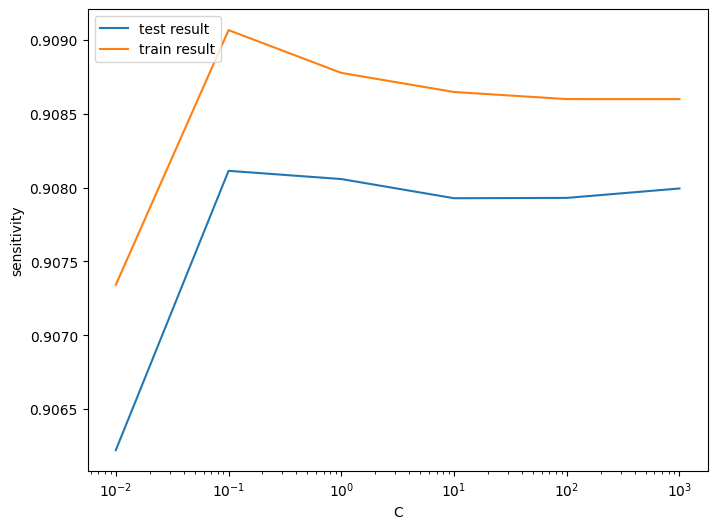

In [102]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [103]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9081130455544466 at C = 0.1


#### Logistic regression with optimal C

In [104]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [105]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [106]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [107]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13316  2209]
 [ 1418 14107]]


In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8831884057971015
Sensitivity: 0.9086634460547504
Specificity: 0.8577133655394525


##### Prediction on the test set

In [110]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [111]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3326  541]
 [  25  109]]


In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8585353661584604
Sensitivity: 0.8134328358208955
Specificity: 0.8600982673907421


##### Model summary

- Train set
    - Accuracy: 0.88
    - Sensitivity: 0.91
    - Specificity: 0.86
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.81
    - Specificity = 0.86

Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Support Vector Machine(SVM) with PCA

In [114]:
# Importing SVC
from sklearn.svm import SVC

##### Hyperparameter tuning
C:- Regularization parameter.
gamma:- Handles non linear classifications.

In [115]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [116]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.388493,0.268163,7.168792,0.335332,1,0.01,"{'C': 1, 'gamma': 0.01}",0.939130,0.939903,0.940097,0.939710,0.000417,5,0.944879,0.943961,0.942077,0.943639,0.001166
1,14.463403,0.348607,9.806940,0.160429,1,0.001,"{'C': 1, 'gamma': 0.001}",0.883671,0.888696,0.887729,0.886699,0.002177,10,0.889710,0.887150,0.887198,0.888019,0.001196
2,19.398601,0.196524,13.604671,0.163141,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.856812,0.858744,0.860290,0.858615,0.001423,12,0.859710,0.859807,0.857923,0.859147,0.000866
3,10.181229,0.996120,5.030627,0.607027,10,0.01,"{'C': 10, 'gamma': 0.01}",0.962029,0.961353,0.965217,0.962866,0.001685,3,0.971739,0.970773,0.969614,0.970709,0.000869
4,14.023709,1.617786,8.867410,0.845650,10,0.001,"{'C': 10, 'gamma': 0.001}",0.906957,0.912271,0.910821,0.910016,0.002243,8,0.914444,0.912705,0.913961,0.913704,0.000733
5,13.929117,0.285495,9.610284,0.084195,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.878068,0.879903,0.881063,0.879678,0.001233,11,0.883140,0.879179,0.880242,0.880853,0.001674
6,10.318019,0.434812,2.931387,0.085788,100,0.01,"{'C': 100, 'gamma': 0.01}",0.972560,0.974010,0.975845,0.974138,0.001344,2,0.988213,0.987488,0.987536,0.987746,0.000331
7,12.813132,0.354115,5.975203,0.105471,100,0.001,"{'C': 100, 'gamma': 0.001}",0.935362,0.937874,0.935556,0.936264,0.001141,6,0.942899,0.942754,0.940580,0.942077,0.001061
8,12.664375,0.189871,8.221399,0.028580,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.888599,0.894493,0.892754,0.891948,0.002473,9,0.896715,0.894300,0.892271,0.894428,0.001817
9,16.331744,0.877329,2.095345,0.063268,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.976039,0.977778,0.981063,0.978293,0.002083,1,0.997681,0.997633,0.997488,0.997601,0.000082


##### Plotting the accuracy with various C and gamma values

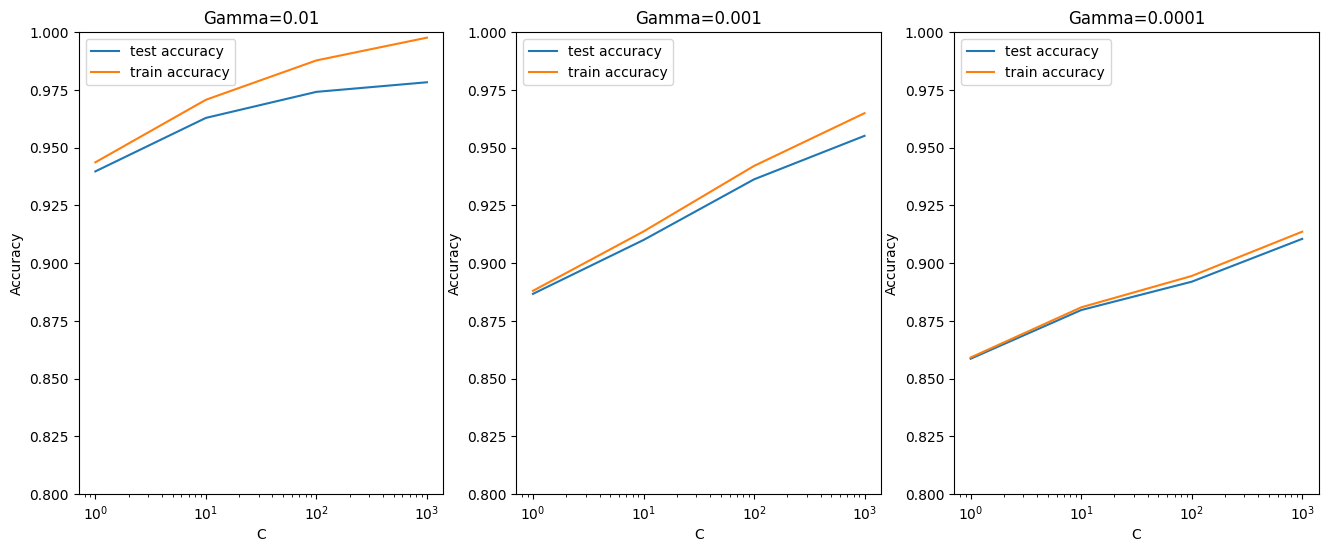

In [117]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [118]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9782930756843801 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

Also, at C=100 we have a good accuracy and the train and test scores are comparable.

Though sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~90%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:

High gamma (i.e. high non-linearity) and average value of C
Low gamma (i.e. less non-linearity) and high value of C
We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

#### Build the model with optimal hyperparameters

In [119]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on the train set

In [120]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [121]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13371  2154]
 [ 1040 14485]]


In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8971336553945249
Sensitivity: 0.9330112721417069
Specificity: 0.861256038647343


##### Prediction on the test set

In [124]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [125]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3349  518]
 [  29  105]]


In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8632841789552612
Sensitivity: 0.7835820895522388
Specificity: 0.8660460305146108


##### Model summary

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.93
    - Specificity = 0.86
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.78
    - Specificity = 0.86

#### Decision tree with PCA

In [128]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

Hyperparameter tuning

In [129]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [130]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.038557,0.046278,0.006397,0.003199,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.910145,0.904348,0.875684,0.909179,0.890177,0.897907,0.013205,1
1,2.015803,0.022610,0.007405,0.001732,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.910145,0.904348,0.875684,0.909179,0.890177,0.897907,0.013205,1
2,2.003474,0.046428,0.005266,0.004300,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.907568,0.908213,0.874396,0.905314,0.890177,0.897134,0.013145,3
3,1.998791,0.014294,0.001721,0.003166,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.907568,0.908213,0.874396,0.905314,0.890177,0.897134,0.013145,3
4,3.489237,0.050882,0.008347,0.000386,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.889211,0.891143,0.881804,0.905958,0.909501,0.895523,0.010503,5
5,3.422574,0.018855,0.006686,0.003385,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.889211,0.891143,0.881804,0.905636,0.909501,0.895459,0.010439,6
6,3.165973,0.047345,0.004493,0.003657,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.869243,0.890177,0.875362,0.866667,0.875040,0.875298,0.008156,7
7,3.207608,0.081937,0.004812,0.003929,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.869243,0.890177,0.875362,0.866667,0.875040,0.875298,0.008156,7


##### Model with optimal hyperparameters

In [131]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [132]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13689  1836]
 [ 1094 14431]]


In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9056360708534622
Sensitivity: 0.9295330112721417
Specificity: 0.8817391304347826


##### Prediction on the test set

In [135]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3353  514]
 [  40   94]]


In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8615346163459136
Sensitivity: 0.7014925373134329
Specificity: 0.8670804241013705


##### Model summary

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.70
    - Specificity = 0.87

We can see from the model performance that the Sensitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

#### Random forest with PCA

In [137]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [138]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [139]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8513687600644122 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


#### Model with optimal hyperparameters

In [140]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [141]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Prediction on the train set

In [142]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12576  2949]
 [ 1498 14027]]


In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8567793880837359
Sensitivity: 0.9035104669887278
Specificity: 0.8100483091787439


##### Prediction on the test set

In [144]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3126  741]
 [  33  101]]


In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8065483629092727
Sensitivity: 0.753731343283582
Specificity: 0.8083785880527541


#### Model summary

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.90
    - Specificity = 0.81
- Test set
    - Accuracy = 0.81
    - Sensitivity = 0.74
    - Specificity = 0.81

We can see from the model performance that the Sensitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

##### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, Logistic regression or the SVM models perform well. For both the models the sensitivity was approx 83%. Also we have good accuracy of approx 87.5%.

### Without PCA

#### Logistic regression with No PCA

In [146]:
##### Importing stats model
import statsmodels.api as sm
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
# Fit the model
log_no_pca = log_no_pca.fit().summary()
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    30959
Model Family:                Binomial   Df Model:                           90
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9146.4
Date:                Wed, 10 Apr 2024   Deviance:                       18293.
Time:                        02:21:19   Pearson chi2:                 3.00e+07
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5494
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1860      0.065     -2.844      0.004      -0.314      -0.058
loc_og_t2o_mou           -2.122e-07   4.25e-08     -4.993      0.000   -2.95e-07   -1.29e-07
std_og_t2o_mou             2.38e-07   3.15e-08      7.555      0.000    1.76e-07       3e-07
loc_ic_t2o_mou            3.171e-07   4.86e-08      6.525      0.000    2.22e-07    4.12e-07
arpu_6                      -0.2905      0.091     -3.201      0.001      -0.468      -0.113
arpu_7                       0.7127      0.096      7.390      0.000       0.524       0.902
onnet_mou_6                 -4.0605      3.384     -1.200      0.230     -10.693       2.572
onnet_mou_7                  3.5973      1.857      1.937      0.053      -0.042       7.237
offnet_mou_6                -5.7566      3.321     -1.733      0.083     -12.266       0.753
offnet_mou_7                 1.0134      1.758      0.576      0.564      -2.433       4.460
roam_ic_mou_6               -0.1900      0.044     -4.356      0.000      -0.275      -0.105
roam_ic_mou_7                0.3088      0.049      6.250      0.000       0.212       0.406
roam_og_mou_6                1.7327      1.103      1.570      0.116      -0.430       3.896
roam_og_mou_7                0.1375      0.487      0.282      0.778      -0.817       1.093
loc_og_t2t_mou_6          3323.9202    724.598      4.587      0.000    1903.735    4744.106
loc_og_t2t_mou_7           843.2278    757.104      1.114      0.265    -640.669    2327.125
loc_og_t2m_mou_6          3510.4423    765.150      4.588      0.000    2010.775    5010.109
loc_og_t2m_mou_7           810.2805    726.621      1.115      0.265    -613.871    2234.432
loc_og_t2f_mou_6           289.0852     62.977      4.590      0.000     165.652     412.518
loc_og_t2f_mou_7            67.7981     61.157      1.109      0.268     -52.068     187.664
loc_og_t2c_mou_6             0.1282      0.034      3.825      0.000       0.062       0.194
loc_og_t2c_mou_7            -0.1123      0.030     -3.777      0.000      -0.171      -0.054
loc_og_mou_6             -6689.9627   1397.239     -4.788      0.000   -9428.501   -3951.425
loc_og_mou_7              3437.1596   1460.156      2.354      0.019     575.306    6299.013
std_og_t2t_mou_6          5889.1656   2069.529      2.846      0.004    1832.964    9945.367
std_og_t2t_mou_7         -1.134e+04   1735.447     -6.535      0.000   -1.47e+04   -7939.187
std_og_t2m_mou_6          5725.5486   2011.316      2.847      0.004    1783.442    9667.655
std_og_t2m_mou_7         -1.126e+04   1723.437     -6.533      0.000   -1.46e+04   -7882.132
std_og_t2f_mou_6           125.3849     44.050      2.846      0.004      39.048     211.722
std_og_t2f_mou_7          -295.3435     45.190     -6.536      0.000    -383.915    -206.772
std_og_t2c_mou

#### Model Analysis

We can see that there are few features have positive coefficients and few have negative.
Some features have higher p-values and hence became insignificant in the model.

#### Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [147]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [148]:
# RFE with 15 columns

# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [149]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['onnet_mou_6', 'offnet_mou_7', 'roam_og_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'total_og_mou_7', 'loc_ic_mou_7',
       'last_day_rch_amt_7', 'monthly_2g_6', 'monthly_3g_7', 'sachet_3g_7',
       'aug_vbc_3g', 'churn_probability', 'decrease_arpu_action',
       'decrease_vbc_action'],
      dtype='object')


#### Model-1 with RFE selected columns

In [150]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31034
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10279.
Date:                Wed, 10 Apr 2024   Deviance:                       20559.
Time:                        02:22:03   Pearson chi2:                 1.26e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5153
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2955      0.043     -6.830      0.000      -0.380      -0.211
onnet_mou_6              0.5453      0.028     19.588      0.000       0.491       0.600
offnet_mou_7            -1.7090      0.107    -16.030      0.000      -1.918      -1.500
roam_og_mou_7            1.3318      0.037     36.290      0.000       1.260       1.404
std_og_t2m_mou_6         0.9086      0.033     27.865      0.000       0.845       0.973
std_og_t2m_mou_7         1.2677      0.101     12.515      0.000       1.069       1.466
total_og_mou_7          -0.6096      0.035    -17.598      0.000      -0.678      -0.542
loc_ic_mou_7            -1.3485      0.057    -23.697      0.000      -1.460      -1.237
last_day_rch_amt_7      -0.6017      0.029    -20.706      0.000      -0.659      -0.545
monthly_2g_6            -0.5133      0.037    -13.977      0.000      -0.585      -0.441
monthly_3g_7            -1.1746      0.108    -10.836      0.000      -1.387      -0.962
sachet_3g_7             -1.9314      0.156    -12.362      0.000      -2.238      -1.625
aug_vbc_3g              -0.6687      0.058    -11.500      0.000      -0.783      -0.555
churn_probability        0.8670      0.023     38.421      0.000       0.823       0.911
decrease_arpu_action    -0.5781      0.043    -13.405      0.000      -0.663      -0.494
decrease_vbc_action     -1.5623      0.119    -13.100      0.000      -1.796      -1.329
========================================================================================
"""

In [151]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_7,8.76
4,std_og_t2m_mou_7,8.05
5,total_og_mou_7,3.39
3,std_og_t2m_mou_6,1.94
0,onnet_mou_6,1.84
6,loc_ic_mou_7,1.43
11,aug_vbc_3g,1.32
2,roam_og_mou_7,1.29
9,monthly_3g_7,1.29
13,decrease_arpu_action,1.24


In [152]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('offnet_mou_7')
print(log_cols)

['onnet_mou_6', 'roam_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'total_og_mou_7', 'loc_ic_mou_7', 'last_day_rch_amt_7', 'monthly_2g_6', 'monthly_3g_7', 'sachet_3g_7', 'aug_vbc_3g', 'churn_probability', 'decrease_arpu_action', 'decrease_vbc_action']


#### Model-2
Building the model after removing offnet_mou_7 variable.

In [153]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31035
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10435.
Date:                Wed, 10 Apr 2024   Deviance:                       20869.
Time:                        02:22:04   Pearson chi2:                 5.77e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5104
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2566      0.043     -6.023      0.000      -0.340      -0.173
onnet_mou_6              0.6883      0.028     24.881      0.000       0.634       0.743
roam_og_mou_7            1.0879      0.033     33.443      0.000       1.024       1.152
std_og_t2m_mou_6         0.9075      0.033     27.875      0.000       0.844       0.971
std_og_t2m_mou_7        -0.2137      0.037     -5.747      0.000      -0.287      -0.141
total_og_mou_7          -0.7467      0.035    -21.227      0.000      -0.816      -0.678
loc_ic_mou_7            -1.8812      0.050    -37.441      0.000      -1.980      -1.783
last_day_rch_amt_7      -0.6239      0.029    -21.645      0.000      -0.680      -0.567
monthly_2g_6            -0.5038      0.036    -13.844      0.000      -0.575      -0.432
monthly_3g_7            -1.2039      0.108    -11.165      0.000      -1.415      -0.993
sachet_3g_7             -1.9387      0.154    -12.619      0.000      -2.240      -1.638
aug_vbc_3g              -0.6995      0.057    -12.203      0.000      -0.812      -0.587
churn_probability        0.8806      0.022     39.197      0.000       0.837       0.925
decrease_arpu_action    -0.6079      0.042    -14.303      0.000      -0.691      -0.525
decrease_vbc_action     -1.5584      0.119    -13.116      0.000      -1.791      -1.326
========================================================================================
"""

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_t2m_mou_7,3.36
4,total_og_mou_7,2.79
2,std_og_t2m_mou_6,1.94
0,onnet_mou_6,1.62
10,aug_vbc_3g,1.32
8,monthly_3g_7,1.29
12,decrease_arpu_action,1.23
5,loc_ic_mou_7,1.21
13,decrease_vbc_action,1.21
1,roam_og_mou_7,1.14


In [155]:
# Removing offnet_mou_8 column
log_cols.remove('std_og_t2m_mou_7')

#### Model-3
Model after removing std_og_t2m_mou_7 column.

In [156]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31036
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10451.
Date:                Wed, 10 Apr 2024   Deviance:                       20903.
Time:                        02:22:05   Pearson chi2:                 5.87e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5099
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2672      0.043     -6.285      0.000      -0.351      -0.184
onnet_mou_6              0.7622      0.025     30.248      0.000       0.713       0.812
roam_og_mou_7            1.0875      0.033     33.318      0.000       1.024       1.151
std_og_t2m_mou_6         0.7906      0.024     32.368      0.000       0.743       0.839
total_og_mou_7          -0.8742      0.028    -30.707      0.000      -0.930      -0.818
loc_ic_mou_7            -1.8441      0.050    -37.111      0.000      -1.942      -1.747
last_day_rch_amt_7      -0.6251      0.029    -21.667      0.000      -0.682      -0.569
monthly_2g_6            -0.5041      0.036    -13.861      0.000      -0.575      -0.433
monthly_3g_7            -1.2058      0.108    -11.176      0.000      -1.417      -0.994
sachet_3g_7             -1.9228      0.153    -12.532      0.000      -2.224      -1.622
aug_vbc_3g              -0.7043      0.057    -12.303      0.000      -0.817      -0.592
churn_probability        0.8682      0.022     38.993      0.000       0.825       0.912
decrease_arpu_action    -0.5944      0.042    -14.011      0.000      -0.678      -0.511
decrease_vbc_action     -1.5463      0.119    -13.041      0.000      -1.779      -1.314
========================================================================================
"""

In [157]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_7,1.54
0,onnet_mou_6,1.36
2,std_og_t2m_mou_6,1.35
9,aug_vbc_3g,1.32
7,monthly_3g_7,1.29
11,decrease_arpu_action,1.23
12,decrease_vbc_action,1.21
4,loc_ic_mou_7,1.18
1,roam_og_mou_7,1.14
5,last_day_rch_amt_7,1.11


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclude that Model-3 log_no_pca_3 will be the final model.

#### Model performance on the train set

In [158]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.007374
1    0.000122
2    0.001842
3    0.000162
4    0.399664
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [159]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['id'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,id
0,0,0.007374,0
1,0,0.000122,1
2,0,0.001842,2
3,0,0.000162,3
4,0,0.399664,4


##### Finding Optimal Probablity Cutoff Point

In [160]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007374,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000122,1,1,0,0,0,0,0,0,0,0,0
2,0,0.001842,2,1,0,0,0,0,0,0,0,0,0
3,0,0.000162,3,1,0,0,0,0,0,0,0,0,0
4,0,0.399664,4,1,1,1,1,0,0,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [161]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.753623     0.991240     0.516006
0.2          0.2  0.807536     0.981900     0.633172
0.3          0.3  0.836683     0.959163     0.714203
0.4          0.4  0.858776     0.928502     0.789050
0.5          0.5  0.868084     0.883607     0.852560
0.6          0.6  0.857713     0.815266     0.900161
0.7          0.7  0.828309     0.723414     0.933205
0.8          0.8  0.786151     0.619195     0.953108
0.9          0.9  0.712174     0.450564     0.973784


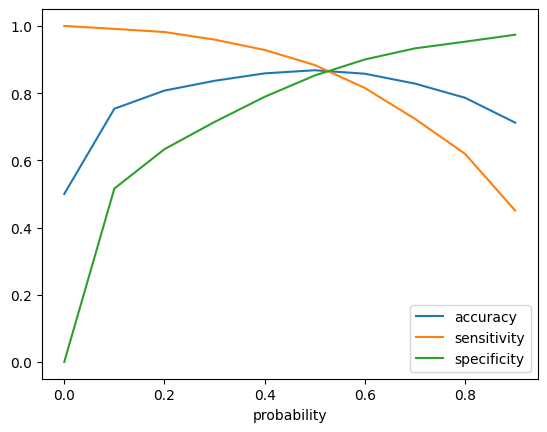

In [162]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

#### Analysis of the above curve
- Accuracy - Becomes stable around 0.6
- Sensitivity - Decreases with the increased probablity.
- Specificity - Increases with the increasing probablity.
- Around point 0.6 where the three parameters cut each other, we can see that there is a balance between sensitivity and specificity with a good accuracy.
- Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking 0.5 for acheiving higher sensitivity, which is our main goal.

In [163]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.007374,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000122,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.001842,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000162,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.399664,4,1,1,1,1,0,0,0,0,0,0,0


In [164]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[13236  2289]
 [ 1807 13718]]


In [165]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8680837359098229
Sensitivity: 0.8836070853462158
Specificity: 0.8525603864734299


We have got good accuracy, sensitivity and specificity on the train set prediction.

#### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [166]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

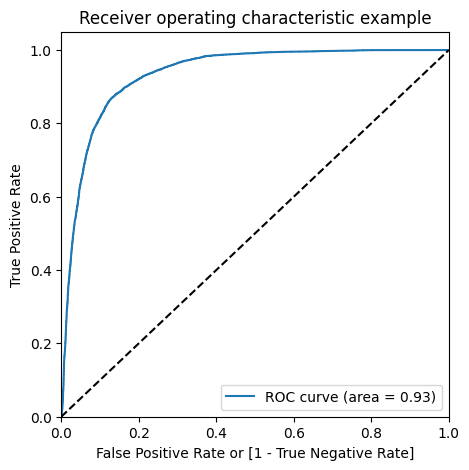

In [167]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

#### Testing the model on the test set

In [176]:
print(log_cols)
log_cols.remove('churn_probability') 

['onnet_mou_6', 'roam_og_mou_7', 'std_og_t2m_mou_6', 'total_og_mou_7', 'loc_ic_mou_7', 'last_day_rch_amt_7', 'monthly_2g_6', 'monthly_3g_7', 'sachet_3g_7', 'aug_vbc_3g', 'decrease_vbc_action']


ValueError: list.remove(x): x not in list

In [175]:
print(log_cols)
log_cols.remove('decrease_arpu_action') 

['onnet_mou_6', 'roam_og_mou_7', 'std_og_t2m_mou_6', 'total_og_mou_7', 'loc_ic_mou_7', 'last_day_rch_amt_7', 'monthly_2g_6', 'monthly_3g_7', 'sachet_3g_7', 'aug_vbc_3g', 'decrease_arpu_action', 'decrease_vbc_action']


In [177]:
print(log_cols)
log_cols.remove('decrease_vbc_action') 

['onnet_mou_6', 'roam_og_mou_7', 'std_og_t2m_mou_6', 'total_og_mou_7', 'loc_ic_mou_7', 'last_day_rch_amt_7', 'monthly_2g_6', 'monthly_3g_7', 'sachet_3g_7', 'aug_vbc_3g', 'decrease_vbc_action']


In [180]:
# Taking a copy of the test set
X_test_log = pd.read_csv('test.csv')
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)
X_test_sm.shape

(30000, 11)

#### Predictions on the test set with final model

In [192]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)
y_test_pred.head()


ValueError: shapes (30000,11) and (14,) not aligned: 11 (dim 1) != 14 (dim 0)